# Belarus Car Price Prediction


The aim of this project is to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. The project also aims to find out the set the of variables that has most impact on the car price.

The dataset has been taken from kaggle. It has 56244 rows and 12 columns.

In [385]:
# Loading the important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [387]:
# Loading the Dataset 
df = pd.read_csv("Belarus Car Price Prediction.csv")

In [389]:
# Sample rows of dataset 
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


# Data Preprocessing 

In [392]:
# Checking the shape of the dataset 
df.shape

(56244, 12)

- The dataset contains 56244 rows and 12 columns  

In [395]:
# Checking the data types of the columns 
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

- The data contains three types of datatypes naimly Object, Integer and Float 

In [398]:
# Dropping the columns that are not relevent for the analysis 
df.drop(columns=['model','segment'],inplace=True)

In [400]:
# Checking the unique values in the column 
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [402]:
# Unique Car Make 
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

- Since there are too many car make, and it is difficult to analyze them individually, so I will group them into categories : Luxury European, Mainstream European, Russina/ Eastern European, Asian, American, Speciality, and Other. The grouping is based on the car make and the country of origin. 

In [405]:
# Categorizing the Car Make 
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df['make_segment'] = df['make'].apply(car_make)

# Descriptive Statistics 

In [408]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


- Wide Range of Values: The data shows a wide range across several attributes. For example, prices, mileage, and engine volume have very low minimums and very high maximums. This suggests that the dataset includes a diverse mix of vehicles, from low-end to high-end, as well as vehicles with both low and very high usage.

- Possible Outliers: Some values, especially in mileage and engine volume, are extreme and may be outliers.
  
- High Variability: There is a large standard deviation in attributes like price and mileage, indicating that values are spread out significantly around the mean. This variability suggests that the dataset includes vehicles in a wide range of conditions, ages, and price brackets.

- Potential for Missing Data: The volume attribute has slightly fewer entries than other attributes, indicating that there may be some missing data in this column.

# Exploratory Data Analysis

In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

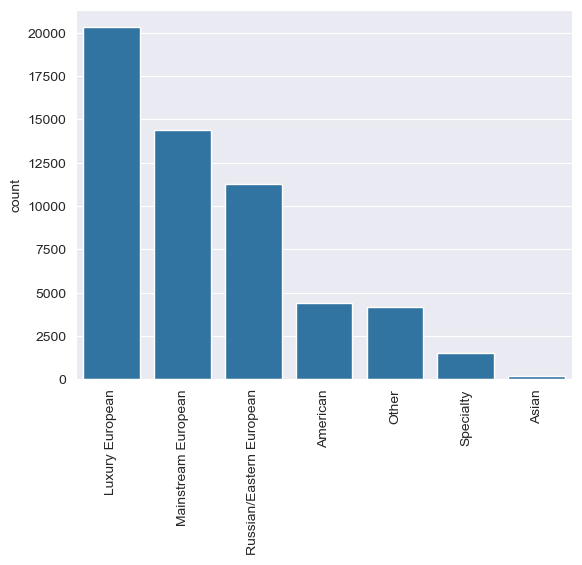

In [413]:
sns.barplot(x=df['make_segment'].unique(), y=df['make_segment'].value_counts())
plt.xticks(rotation=90)

- The dataset mostly has European cars, especially luxury ones. It also has American, Asian, and some special cars like Tesla and McLaren. There are a few cars that don't fit into any of these categories.

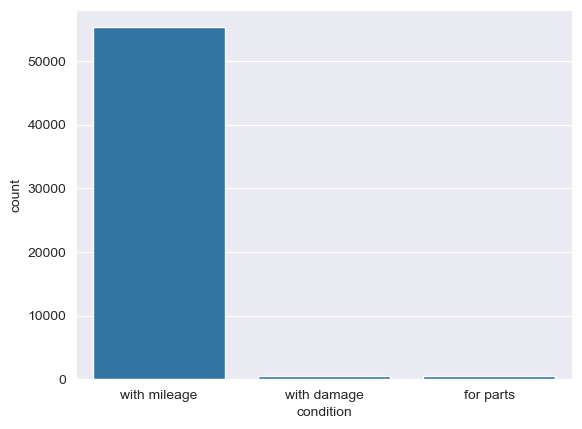

In [416]:
sns.countplot(x='condition',data=df)
plt.show()

- From the above graph we can analyze that the cars which are having high mileage are high in demand

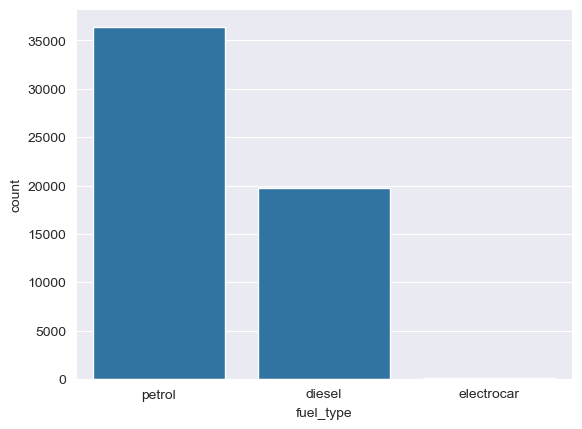

In [419]:
sns.countplot(data=df,x='fuel_type')
plt.show()

- From the above countplot it is clearly visible that petrol cars are high and electric cars and low in demand

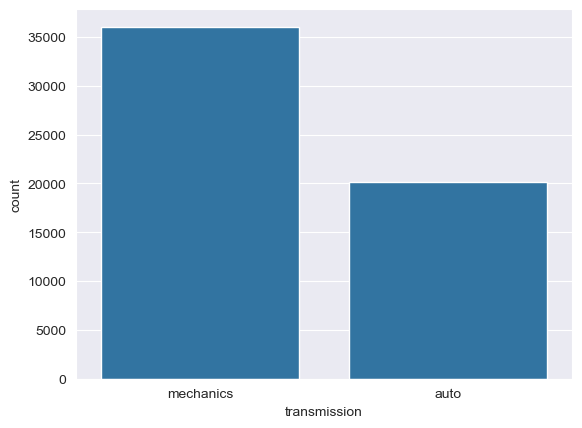

In [422]:
sns.countplot(data=df,x='transmission')
plt.show()

- The cars with the mechanical or manual transmission are high in demands.

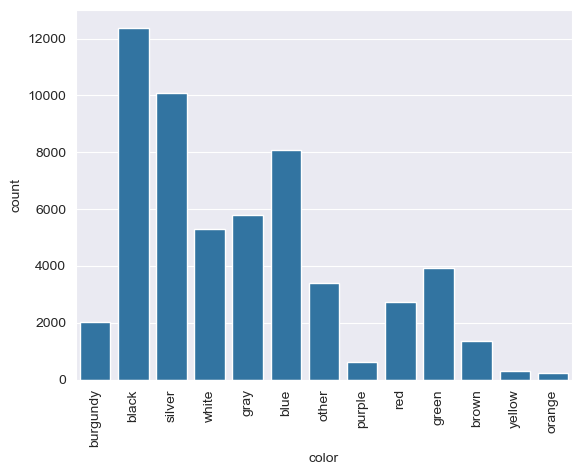

In [425]:
sns.countplot(x='color',data=df)
plt.xticks(rotation=90)
plt.show()

- The majority of the cars being sold are in black colors followed by silver, blue, white and gray
- The least number of cars are being sold in the orange and yellow colors.

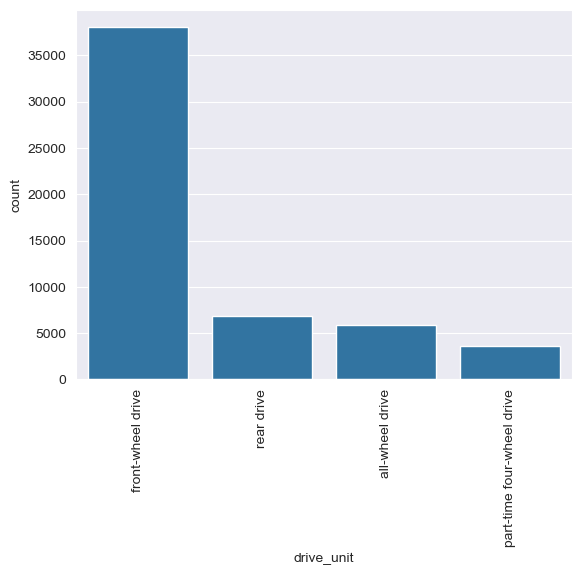

In [427]:
sns.countplot(x='drive_unit',data=df)
plt.xticks(rotation=90)
plt.show()

- Mojority of the cars being sold have front wheel drive

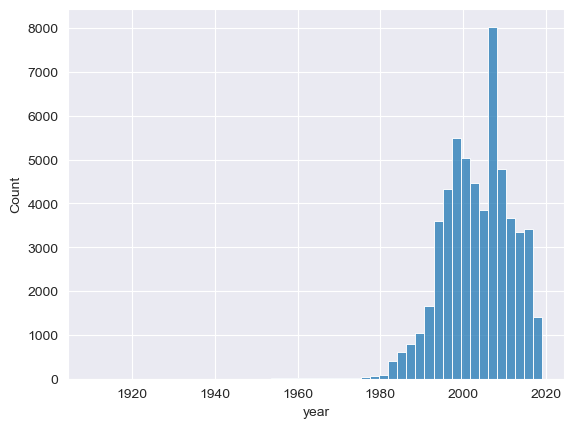

In [431]:
sns.histplot(df['year'],bins=50)
plt.show()

- Majority of the cars are manufactured between 1990 to 2019

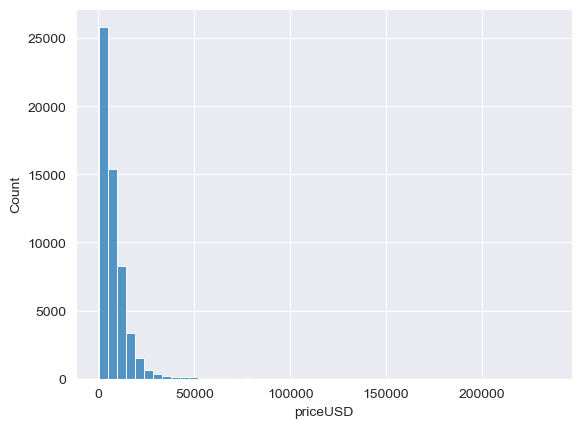

In [433]:
sns.histplot(df['priceUSD'],bins=50)
plt.show()

- Majority of the prices are less than 50k USD

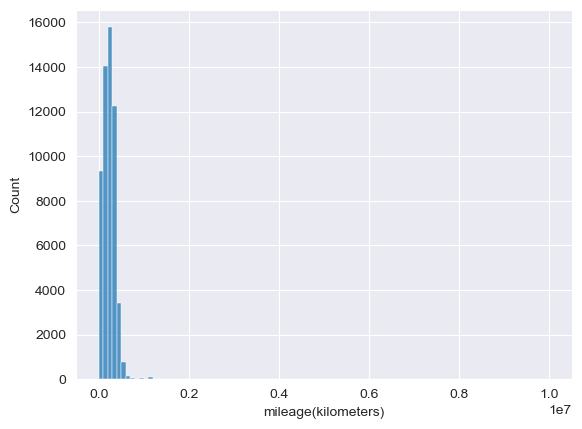

In [436]:
sns.histplot(df['mileage(kilometers)'],bins=100)
plt.show()

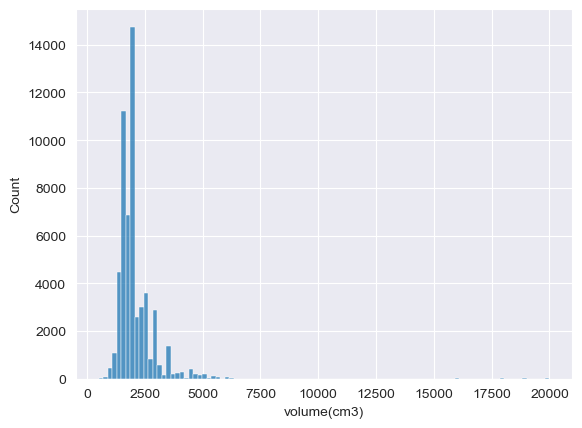

In [438]:
sns.histplot(df['volume(cm3)'],bins=100)
plt.show()

- Majority of the engine volume is between 1740 to 2000 Cm3.

- Since most of the cars are manufastured after 1980 so we will only consider the cars manufactured after 1980

In [442]:
df = df[df['year']>1980]

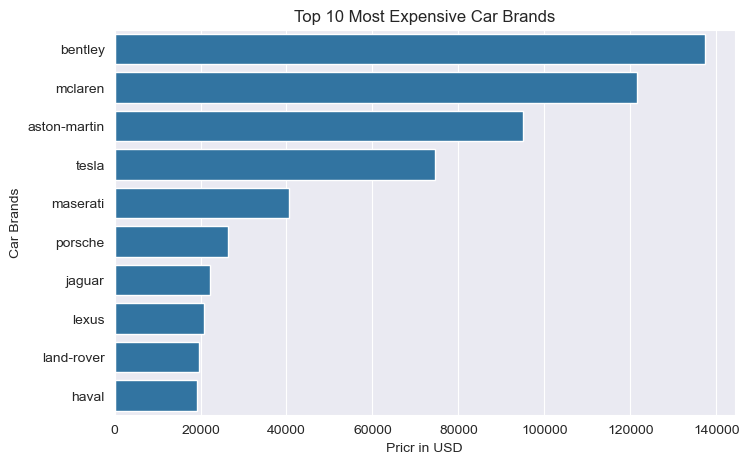

In [443]:
df1 = df.groupby('make')['priceUSD'].mean().reset_index()
df1 = df1.sort_values(by='priceUSD',ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y='make',x='priceUSD',data=df1)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brands')
plt.xlabel('Pricr in USD')
plt.show()


- The graph above shows the top 10 most expensive car brands in the dataset. The top 5 most expensive brands are bently,mclaren,aston-martin,tesla,maserati.

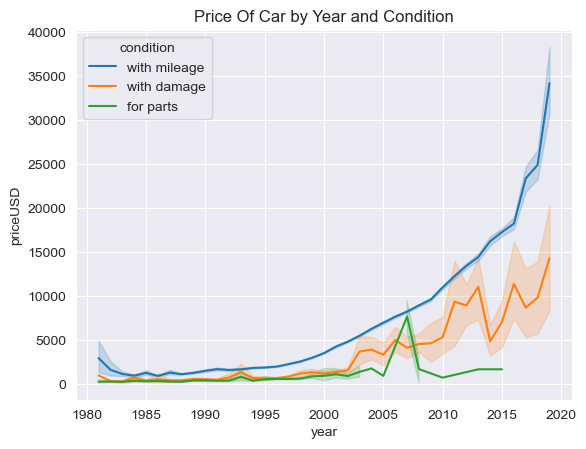

In [447]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='condition')
plt.title('Price Of Car by Year and Condition')
plt.show()

- This graph shows the relationship between price and the year of car along with selling condition of the car. Cars which are sold in workin condition, are more expensive and their price increased with time, having massively increase between 2015 and 2020.
- Cars which were damaged had similar prices which were sold for parts between 1980 to 2000. However their is a significant increase in damaged car prices after 2000.
- Cars which were sold for parts tends to have minimal prices and their prices increses very little with time.

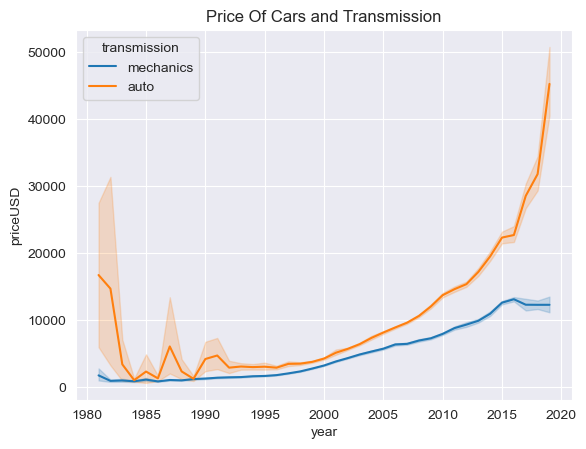

In [450]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='transmission')
plt.title('Price Of Cars and Transmission')
plt.show()

- The graph indicates the change in the Car prices based on the transmission.
- The price of the car with automatic transmission decreases after 1983. However, its price increased significantly after 2000.
- The price of the car with the manual transmission is always less than the auto transmission showing similar increase in price after 2000.

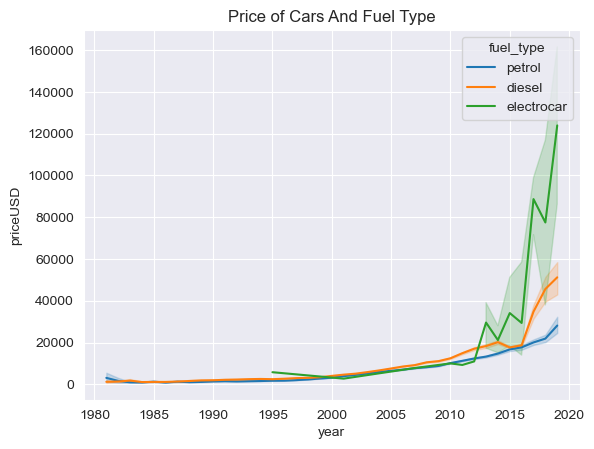

In [452]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='fuel_type')
plt.title('Price of Cars And Fuel Type')
plt.show()

- Till 2025 there were no major difference in the car prices running on the both petrol and diesel.
-  However, after 2015 the prices of the car running on the diesel increases significantly, whereas the price of the cars running on the petrol increased with a very small margin.
-  The graph also highlights the introduction of electric cars in 1995. However the price of these cars increases exponentially aster 2015, having the highest car price based on the fuel type.

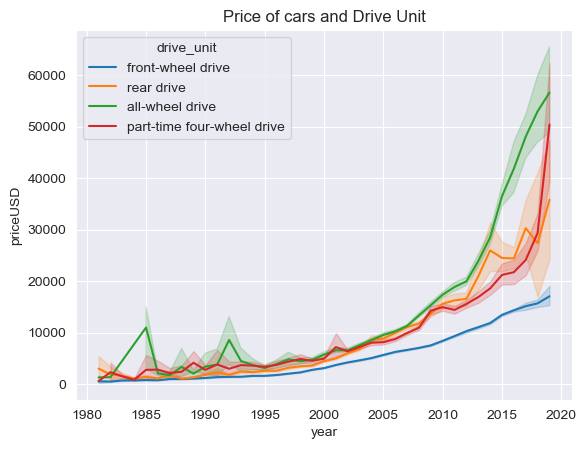

In [454]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='drive_unit')
plt.title('Price of cars and Drive Unit')
plt.show()

- Between 1980 to 1995 there was not much fifference in the prices of the cars based on the drive unit.
- However after 1995, the price of the cars with front wheel drive icreased at a slower pace as compared to others.
- The price of the cars with all wheel drive increased significantly after 2005, having the highest price among all the drive units, followed by part time four wheel drive and rear wheel drive.

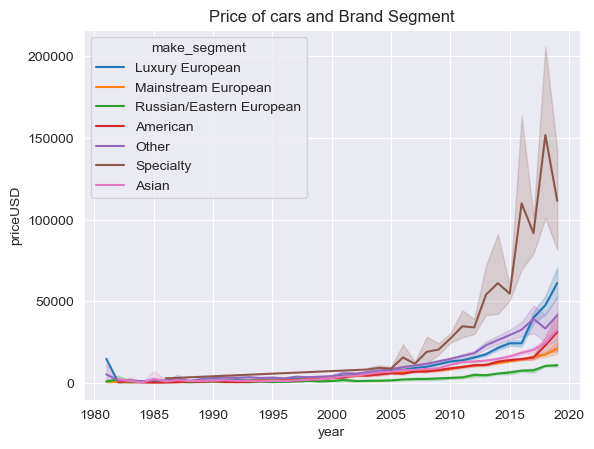

In [456]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='make_segment')
plt.title('Price of cars and Brand Segment')
plt.show()

- This graph shows the surge in car prices after 2005, where we can see that the Specialty car segment prices increased exponentially, having the highest price among all brands followed by Luxury Europen cars, American, Asian and Mainstream Europen Car segments.
- The price of the Russian/Eastern Europen car segment increased at slower pace as compared to other segments and it is lowest among all segments.

In [459]:
# Checking for null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

- Since, the count of missing values is smnall in comparison to dataset size, I am dropping the null values from the dataset.

In [461]:
#dropping null values
df.dropna(inplace=True)

In [462]:
#dropping the make column as their is no need of it for further analysis 
df.drop(columns=['make'],inplace=True)

# Label Encoding

In [465]:
from sklearn.preprocessing import LabelEncoder

In [466]:
cols = ['condition','fuel_type','transmission','color','drive_unit','make_segment']

le = LabelEncoder()

for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col,df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


# Correlation Matrix 

In [468]:
df.corr()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
priceUSD,1.000000,0.631769,0.088324,-0.173054,-0.102242,0.270047,-0.097243,-0.449014,-0.127743,-0.010690
year,0.631769,1.000000,0.125491,-0.255849,-0.058710,0.024654,-0.066585,-0.396227,-0.185661,-0.103564
condition,0.088324,0.125491,1.000000,-0.035519,-0.027190,0.026317,-0.009555,-0.059797,-0.009820,0.018507
mileage(kilometers),-0.173054,-0.255849,-0.035519,1.000000,-0.082808,0.012885,0.016732,0.105151,0.053231,0.031689
fuel_type,-0.102242,-0.058710,-0.027190,-0.082808,1.000000,-0.037797,0.003114,-0.104237,-0.016990,-0.088778
volume(cm3),0.270047,0.024654,0.026317,0.012885,-0.037797,1.000000,-0.091785,-0.348423,0.045046,-0.010200
color,-0.097243,-0.066585,-0.009555,0.016732,0.003114,-0.091785,1.000000,0.097704,-0.019135,-0.002899
transmission,-0.449014,-0.396227,-0.059797,0.105151,-0.104237,-0.348423,0.097704,1.000000,0.011901,0.083363
drive_unit,-0.127743,-0.185661,-0.009820,0.053231,-0.016990,0.045046,-0.019135,0.011901,1.000000,0.095205
make_segment,-0.010690,-0.103564,0.018507,0.031689,-0.088778,-0.010200,-0.002899,0.083363,0.095205,1.000000


<Axes: >

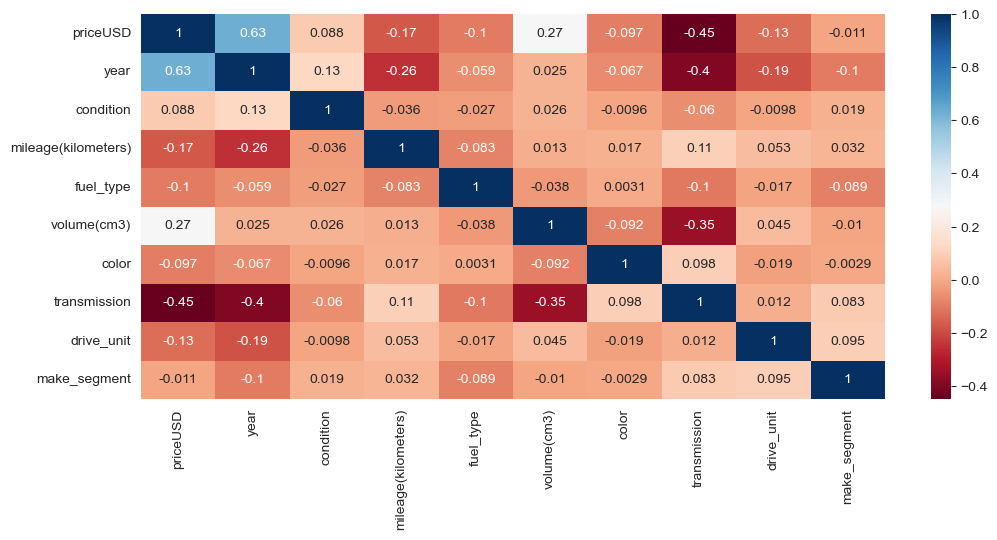

In [469]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

##### This heatmap shows the correlation between various features of a dataset, likely related to vehicles,
- PriceUsd is positively correlated with the year, suggesting that as the year increses the price of the car in also increases.
- PriceUsd is Negatively correlated with the transmission meaning, indicating that certain transmission types may be associated with lower or higher prices
- Mileage shows a negative correlation with the year, supporting that older vehicles tend to have higher mileage.
- Volume shows a slight positive correlation with priceUSD (0.27), suggesting that vehicles with larger engine volumes may be priced higher.
- Transmissin shows a moderate negative correlation with priceUSD (-0.45) and year (-0.4), possibly indicating that older vehicles or certain transmission types are associated with lower prices.

# Outlier Treatments

In [473]:
# We are using z score method to remove outliers 
from scipy import stats

z = np.abs(stats.zscore(df))

cols = ['year','mileage(kilometers)','volume(cm3)']

df = df[(z <3).all(axis=1)]

# Train Test Split 

In [475]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['priceUSD']),df['priceUSD'],test_size=0.2,random_state=42)

# Model Building

In [478]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

### Hypertuning using GridSearchCV

In [480]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dt, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [493]:
#decision tree regressor with best parameters
dt = DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=3, min_samples_split=2, random_state=0)

#fitting the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=3,
                      random_state=0)

In [495]:
#training Score 
dt.score(X_train,y_train)

0.8104611647927854

In [497]:
#Predicting the test set  
y_pred = dt.predict(X_test)

# Model Evaluation 

In [500]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7882645918841029
Mean Squared Error:  6776123.726109616
Mean Absolute Error:  1737.4702703013756
Root Mean Squared Error:  2603.0988698298834


# Feature Importance

In [503]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.481847
6,transmission,0.311809
2,mileage(kilometers),0.092817
4,volume(cm3),0.059627
3,fuel_type,0.030153
7,drive_unit,0.011535
8,make_segment,0.008980
5,color,0.003232
1,condition,0.000000


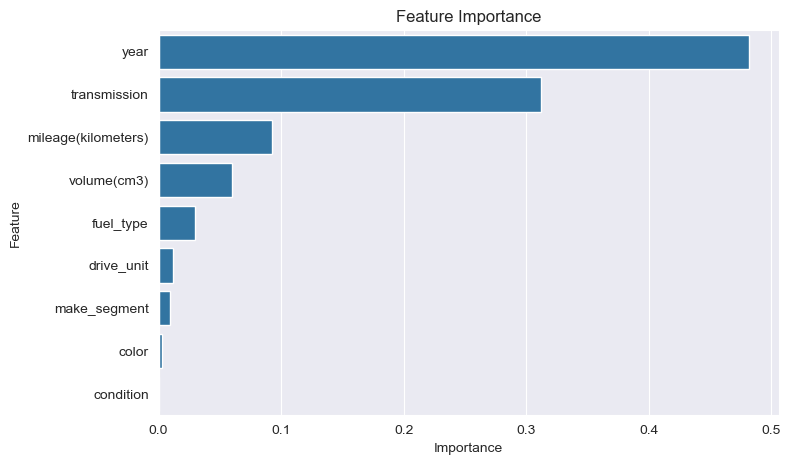

In [505]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

# Conclusion 

The aim of this project was to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. During the exploratory data analysis, it was found that there has been a significant increase in car prices in Belarus after the year 2000. The cars which runs on petrol have automatic transmission have higher price has compared to diesel cars with manual transmission. However, the elctric cars are distinctively expensive than the other cars. The cars with all wheel drive have the highest price among all the drive units. The speciality segment cars have the highest price among all the segments followed by luxury european, american, asian car segments.

The decision tree regressor model was used to predict the car price. The model was able to predict the car price with 78.82% accuracy. The most important features for predicting the car price were found to be year and volume of the engine.


In [510]:
import pandas as pd
from pandas_profiling import ProfileReport

# Generate report
profile = ProfileReport(df, title="Belarus Car Price Prediction", explorative=True)

# Save as HTML or PDF
profile.to_file("Belarus Car Price Prediction.html")  # Saves as HTML
profile.to_file("Belarus Car Price Prediction.pdf")   # Saves as PDF if you have a PDF converter


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]